[6.4 4.8]


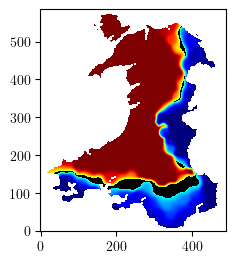

In [167]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)


import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar

import os

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
# matplotlib.use("pgf")

format = "png"
colorbar = "colorbar"
save = True
n = 10
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
isogloss = "isogloss"
path = "../data"

ksa10 = [2500, 54500, 81500]    # alpha = 1.0
# kssa17 = [8000, 28000, 55000]    # alpha = 1.7
kssa17 = [8000]
filenames = []
for k in kssa17:
    # nametemplate = f"walesICbook5Alpha1.0Beta1.1SigmavarFactor1Deltat0.0004Tmax500.0MEMORY_1_{k}.npy"
    nametemplate = f"walesICbook5Alpha1.7Beta1.1SigmavarFactor1Deltat0.0004Tmax500.0MEMORY_1_{k}.npy"
    filenames.append(nametemplate)

includedRegion = np.load("wales_mask.npy").astype(bool)[:586, 50:540]
wales = np.load("wales_country_mask.npy")[:586, 50:540]
wales.shape

for i, filename in enumerate(filenames):

    if i == 0:
        s = fig.get_size_inches()
        print(s)
        fig.set_size_inches(float(s[0])*0.85, float(s[1])*0.6*0.85/0.85)

    savename = f"mWales{i}.pdf"
    filepath = os.path.join(path, filename)
    savepath = os.path.join(path, savename)
    m = np.load(filepath)
    m = m[:586, 50:540]
    m[~wales] = np.nan
    im = ax.imshow(m, origin='lower', cmap=plt.cm.jet, vmin = 0.0, vmax = 1.0)  # Here make an AxesImage rather than contour
    if isogloss == "isogloss":
        if i == 1:
            isogloss_loc = np.where(np.abs(m - 0.5) < 0.15)
        else:
            isogloss_loc = np.where(np.abs(m - 0.5) < 0.15)
        isogloss_array = np.zeros_like(m)
        isogloss_array.fill(np.nan)
        isogloss_array[isogloss_loc] = 255
        ax.imshow(isogloss_array, cmap="binary", origin="lower", vmin=0., vmax=255)

plt.show()


0.9

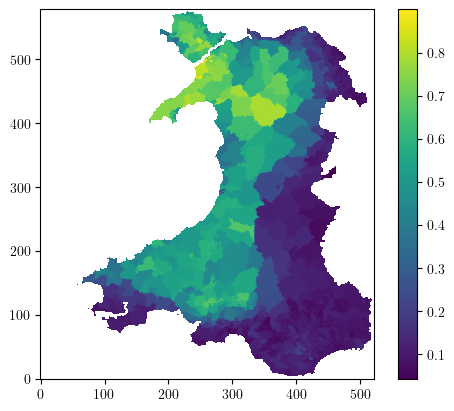

In [95]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


d = Image.open("wales_current_welsh_usage.tif")
mask = Image.open("wales_current_usage_mask.tif")
d = np.array(d) * 1/100
mask = np.array(mask).astype(bool)
d = np.flip(d, axis=0)
mask = np.flip(mask, axis=0)
d[~mask] = np.nan

fig, ax = plt.subplots()

plt.imshow(d, origin="lower")
cb = plt.colorbar()

np.nanmax(d)

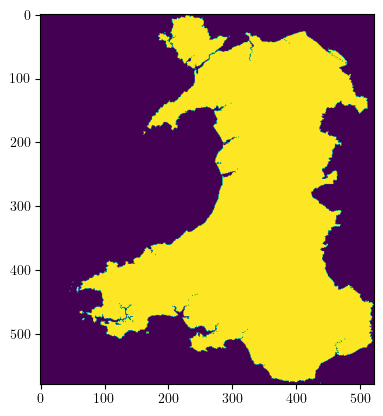

In [90]:
d = Image.open("attempt2_wales_current_welsh_usage.tif")
d = np.array(d)
plt.imshow(d)

In [34]:
diff=m-d
plt.imshow(d)

ValueError: operands could not be broadcast together with shapes (586,490) (579,522) 

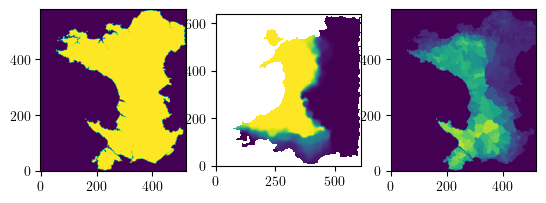

In [101]:
fig, axs = plt.subplots(1,3)

mask = Image.open('attempt2_wales_country_mask.tif')
usage = Image.open('wales_current_welsh_usage.tif')

k = 8000
freq = np.load(f"../data/walesICbook5Alpha1.7Beta1.1SigmavarFactor1Deltat0.0004Tmax500.0MEMORY_1_{k}.npy")


mask = np.array(mask)
usage = np.array(usage)



axs[0].imshow(mask, alpha = 1, origin="lower")
axs[1].imshow(freq, origin='lower')
axs[2].imshow(usage, alpha=1, origin='lower')


(579, 522)
(579, 522)


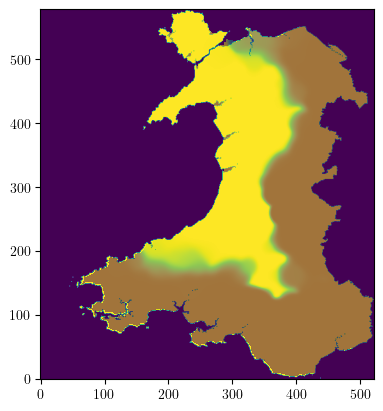

In [161]:
# Fixing size of freq layer
fig, ax = plt.subplots()

mask = Image.open("attempt2_wales_country_mask.tif")
mask = np.array(mask).astype(bool)
k = 28000
freq = np.load(f"../data/walesICbook5Alpha1.7Beta1.1SigmavarFactor1Deltat0.0004Tmax500.0MEMORY_1_{k}.npy")

mask_shape = mask.shape
print(mask_shape)
freq = freq[:mask_shape[0], :mask_shape[1]]
print(freq.shape)

plt.imshow(np.flip(mask, axis=0), origin='lower')
plt.imshow(freq, origin='lower', alpha=0.5)
plt.show();


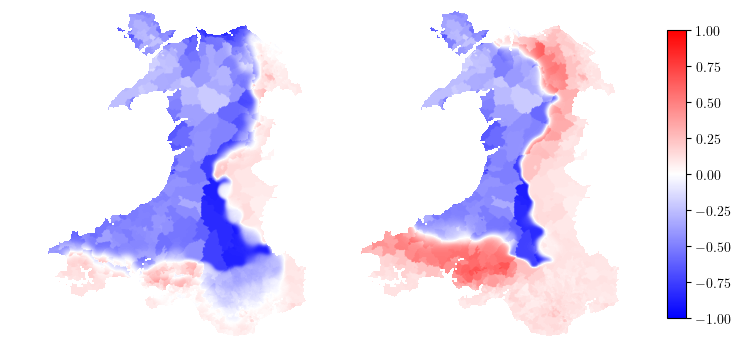

[-35454.26867601887, -4109.096651867772]


In [205]:
gridspec = {'width_ratios': [1, 1], 'height_ratios': [1]}
fig, axs = plt.subplots(1, 2, gridspec_kw=gridspec, constrained_layout=True)

# Get current usage
usage = Image.open('wales_current_welsh_usage.tif')
usage = np.array(usage) * 0.01
usage = np.flip(usage, axis=0)

usage_mask = Image.open("wales_current_usage_mask.tif")
usage_mask = np.array(usage_mask).astype(bool)
usage_mask = np.flip(usage_mask, axis=0)
usage[~usage_mask] = np.nan


ks = [8000, 28000]
freq_mask = Image.open("attempt2_wales_country_mask.tif")
freq_mask = np.array(freq_mask).astype(bool)
freq_mask = np.flip(freq_mask, axis=0)

total_diffs = []

for i, k in enumerate(ks):
    ax = axs[i]
    freq = np.load(f"../data/walesICbook5Alpha1.7Beta1.1SigmavarFactor1Deltat0.0004Tmax500.0MEMORY_1_{k}.npy")
    mask_shape = freq_mask.shape
    freq = freq[:mask_shape[0], :mask_shape[1]]
    freq[~freq_mask] = np.nan

    # usage = usage/(np.nanmax(usage))
    diff = usage - freq
    total_diff = np.nansum(diff)
    total_diffs.append(total_diff)

    diff = ax.imshow(diff, origin='lower', cmap='bwr', vmin=-1, vmax=1)

for ax in axs:
    ax.axis('off')

plt.tight_layout()
# cax = axs[2]
cax = fig.add_axes([1.05, 0.2, 0.03, 0.6], transform = ax.transAxes)
cb = fig.colorbar(diff, cax=cax, shrink=0.9)
# c.set_ylim(-0.9, 0.9)


plt.show();

print(total_diffs)

In [41]:
from PIL import Image

w = Image.fromarray(wales)


In [44]:
w2=w.resize(mask.shape)

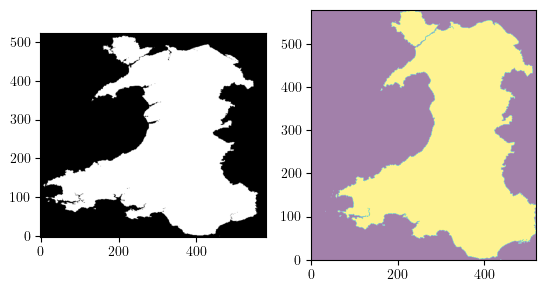

In [46]:
fig, axs = plt.subplots(1,2)

axs[0].imshow(w2, alpha = 1, origin="lower")
axs[1].imshow(np.flip(mask, axis=0), alpha=0.5, origin='lower')